In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('/content/insurance.csv')

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
obj=df.describe(include=object).columns

In [5]:
obj

Index(['sex', 'smoker', 'region'], dtype='object')

In [6]:
for col in obj:
  print(col)
  print(df[col].value_counts)
  print('****************')

sex
<bound method IndexOpsMixin.value_counts of 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object>
****************
smoker
<bound method IndexOpsMixin.value_counts of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>
****************
region
<bound method IndexOpsMixin.value_counts of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>
****************


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


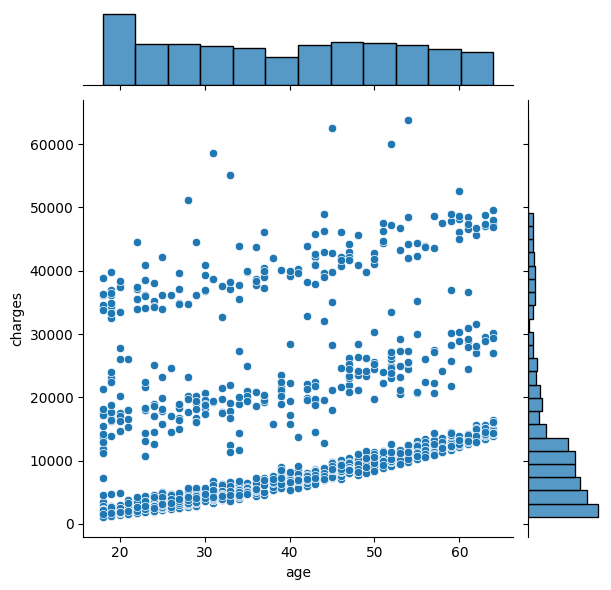

In [11]:
sns.jointplot(x="age",y="charges",data=df)

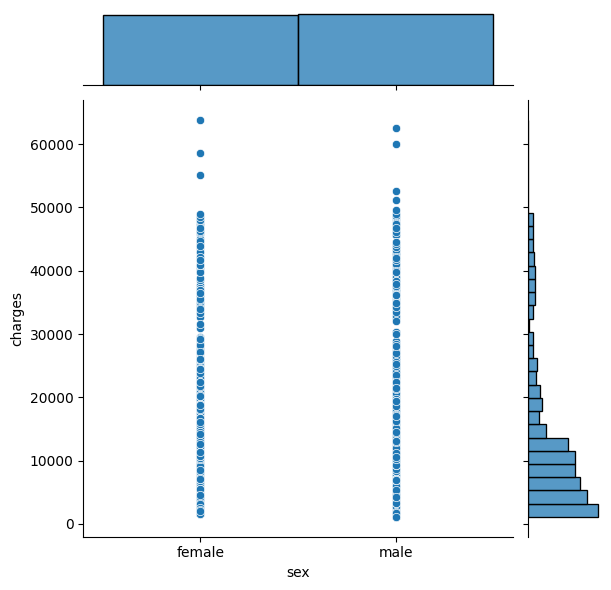

In [12]:
sns.jointplot(x="sex",y="charges",data=df)

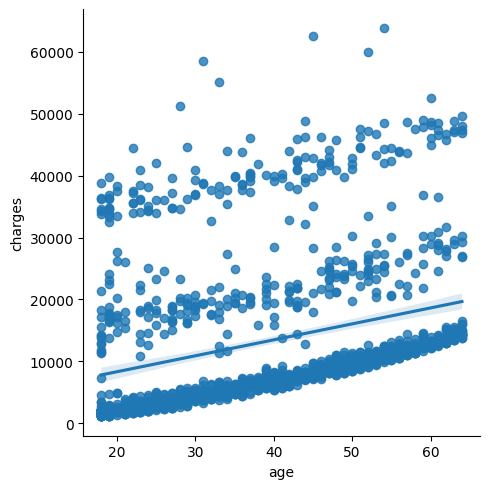

In [13]:
sns.lmplot(x="age",y="charges",data=df)

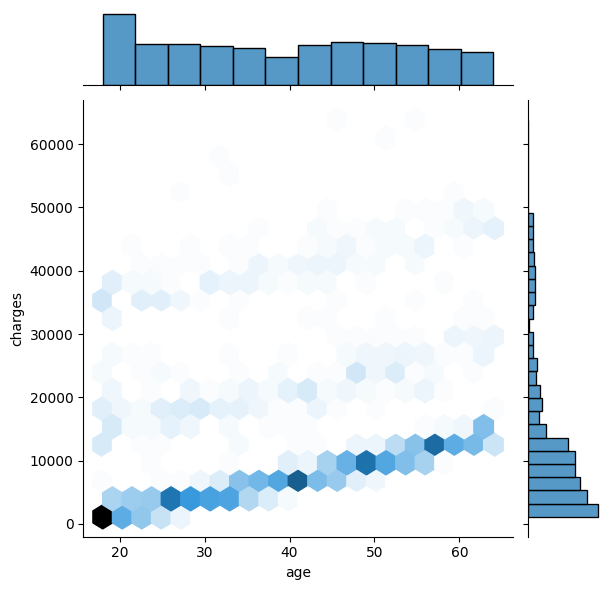

In [14]:
sns.jointplot(x="age",y="charges",data=df,kind='hex')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [16]:
x=df.drop(['charges','region'],axis=1)
y=df['charges']

<ipython-input-17-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

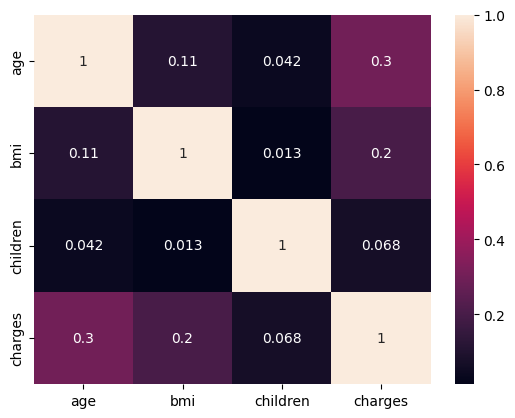

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=110)

In [19]:
x_train

,age,sex,bmi,children,smoker
644,43,male,35.310,2,no
767,42,female,29.000,1,no
744,50,male,26.410,0,no
1312,34,male,42.900,1,no
634,51,male,39.700,1,no
...,...,...,...,...,...
431,29,female,20.235,2,no
381,55,male,30.685,0,yes
1295,20,male,22.000,1,no
61,25,male,33.660,4,no


In [20]:
y_train

644     18806.14547
767      7050.64200
744      8827.20990
1312     4536.25900
634      9391.34600
           ...     
431      4906.40965
381     42303.69215
1295     1964.78000
61       4504.66240
128     32734.18630
Name: charges, Length: 936, dtype: float64

In [21]:
x_train.shape

(936, 5)

In [22]:
x_test.shape

(402, 5)

In [23]:
pip install category_encoders

In [24]:
from category_encoders import TargetEncoder
te=TargetEncoder()
x_train=te.fit_transform(x_train,y_train)
x_test=te.transform(x_test,y_test)

In [25]:
x_test

,age,sex,bmi,children,smoker
538,46,12409.898296,28.05,1,8450.622527
1217,29,13795.736587,37.29,2,8450.622527
837,56,12409.898296,28.31,0,8450.622527
1082,38,13795.736587,19.95,1,8450.622527
563,50,13795.736587,44.77,1,8450.622527
...,...,...,...,...,...
851,61,13795.736587,32.30,2,8450.622527
1117,25,13795.736587,33.33,2,31519.393078
166,20,12409.898296,37.00,5,8450.622527
865,40,13795.736587,29.90,2,8450.622527


In [26]:
x_train

,age,sex,bmi,children,smoker
644,43,13795.736587,35.310,2,8450.622527
767,42,12409.898296,29.000,1,8450.622527
744,50,13795.736587,26.410,0,8450.622527
1312,34,13795.736587,42.900,1,8450.622527
634,51,13795.736587,39.700,1,8450.622527
...,...,...,...,...,...
431,29,12409.898296,20.235,2,8450.622527
381,55,13795.736587,30.685,0,31519.393078
1295,20,13795.736587,22.000,1,8450.622527
61,25,13795.736587,33.660,4,8450.622527


In [27]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
x_train=m.fit_transform(x_train)
x_test=m.transform(x_test)

In [28]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [29]:
pred=lm.predict(x_test)

In [30]:
pred

array([ 9307.30669216,  8319.77507187, 11578.65866347,  4948.99965912,
       15596.04578224, 11525.38248541, 12735.5508557 ,  9283.63113776,
       11580.09893796, 12787.63837792, 12089.65170746, 15188.84211306,
       15651.07077593, 29345.38935938,  9326.59193137,  7047.80080823,
       26620.88214412,  4440.55075304, 10953.71846479,  6545.777619  ,
        7112.05045868,  8471.97218356,  3460.26936149, 22828.3542364 ,
       24055.55489804, 14081.08235529, 13950.32201786, 29076.69747044,
       11233.58604916,  1837.90942701, 11901.02308318, 25604.66988756,
       11215.7442678 , 11876.08794695,  9848.01736099,  2555.02316561,
       29298.32323812,  6858.8799619 ,  4510.87584282, 16099.30499971,
       10454.06173994,  2636.33184437,  7731.82452235,  7948.35477971,
        4503.08827718,  6818.9944406 , 12092.84398094, 33004.25239766,
        8147.94374066, 10022.87659211, 30049.12010516,  9888.75569355,
        5213.15994738, 11577.69578426,  9883.71724278, 33967.1019618 ,
      

Text(0, 0.5, 'Predicted Y')

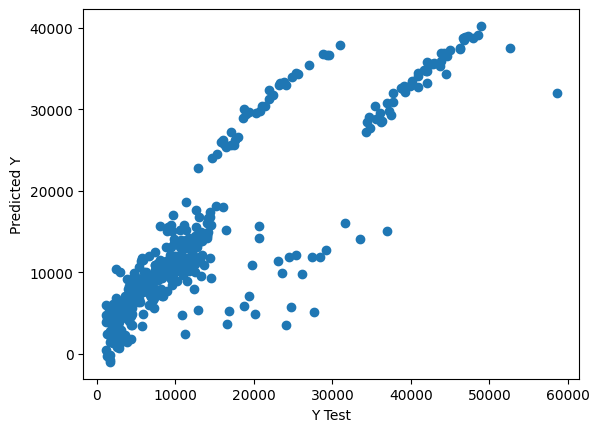

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [32]:
r2_score(y_test,pred)

0.780791348111383